In [262]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_params # вывод результатов тестирования
from statsmodels.iolib.summary2 import summary_col # вывод результатов тестирования
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

## 5 wage equation #2 (структурные сдвиги)
### 5.1 VIFs
Для набора данных `wage2` рассмотрим линейную регрессию


**log(wage) на age, urban, age⋆urban, IQ, IQ⋆urban.**

Какие регрессии нужно рассматривать для вычисления показателей VIF для коэффициентов
**age, urban, age⋆urban**?

Ответ

- **age на urban, age⋆urban, IQ, IQ⋆urban**
- **urban на age, age⋆urban, IQ, IQ⋆urban**
- **age*urban на age, urban, IQ, IQ⋆urban**


In [263]:
df_wage2 = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/wage2.csv')
# data_sleep = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/SwissLabor.csv')
df_wage2

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,520,40,79,28,16,6,1,30,1,1,1,0,0,1.0,11.0,NaN,6.253829
931,1202,40,102,32,13,10,3,31,1,0,1,1,7,7.0,8.0,6.0,7.091742
932,538,45,77,22,12,12,10,28,1,1,1,0,9,NaN,7.0,NaN,6.287858
933,873,44,109,25,12,12,12,28,1,0,1,0,1,1.0,NaN,11.0,6.771935


In [264]:
# sns.pairplot(data_sleep)
# df_wage2

In [265]:
# Добавляем колонку age*urban
# df_wage2['age^2'] = df_wage2['age'] ** 2
# df_wage2['ageurban'] = df_wage2['age'] * df_wage2['urban']
# df_wage2

In [266]:
# Модель log(wage) на age, urban, age⋆urban, IQ, IQ⋆urban.
Wage2_eq51 = smf.ols(formula='np.log(wage) ~ age + urban + I(age*urban) + IQ + I(IQ*urban)', data=df_wage2).fit()
# Wage2_eq51.summary()

In [267]:
# Модель 1:  age на urban, age⋆urban, IQ, IQ⋆urban
# Создаем спецификацию модели через формулу и подгоняем модель
model_51 = smf.ols(formula='age ~ urban + I(age*urban) + IQ + I(IQ*urban)', data=df_wage2).fit()

In [268]:
# model_51.params

In [269]:
# Модель 2: urban на age, age⋆urban, IQ, IQ⋆urban
# Создаем спецификацию модели через формулу и подгоняем модель
model_52 = smf.ols(formula='urban ~ age + I(age*urban) + IQ + I(IQ*urban)', data=df_wage2).fit()

In [270]:
# Модель 3: age⋆urban на age, urban, IQ, IQ⋆urban
# Создаем спецификацию модели через формулу и подгоняем модель
model_53 = smf.ols(formula = 'I(age*urban) ~ age + urban + IQ + I(IQ*urban)', data = df_wage2).fit()

In [271]:
#Результаты подгонки
info_dict = {'No. Observations': lambda x: '{0:d}'.format(int(x.nobs)), 
             'R-squared': lambda x: "%#8.3f" % x.rsquared,
             'Adj. R-squared': lambda x: "%#8.3f" % x.rsquared_adj,
             'Residual Std. Error': lambda x: "%#8.3f" % x.mse_resid**0.5,
             'F-statistic': lambda x: '{:.3f}'.format(x.fvalue), 
             'Prob (F-statistic)': lambda x: '{:.3f}'.format(x.f_pvalue)
             }

print(summary_col([model_51, model_52, model_53],
                  stars=False, float_format='%.3f',
                  info_dict = info_dict
                 )
     )


                      age     urban   I(age * urban)
----------------------------------------------------
I(IQ * urban)       0.001   0.003     -0.005        
                    (0.008) (0.000)   (0.007)       
I(age * urban)      1.000   0.021                   
                    (0.022) (0.000)                 
IQ                  -0.001  -0.002    0.001         
                    (0.007) (0.000)   (0.006)       
Intercept           33.242  0.688     -23.206       
                    (0.692) (0.015)   (0.764)       
R-squared           0.699   0.994     0.991         
R-squared Adj.      0.698   0.994     0.991         
age                         -0.015    0.698         
                            (0.000)   (0.015)       
urban               -33.242           33.565        
                    (1.111)           (0.692)       
No. Observations    935     935       935           
R-squared           0.699   0.994     0.991         
Adj. R-squared      0.698   0.994     0.991  

In [272]:
# VIF для age c округлением до 2-х десятичных знаков
VIF_1 = 1/(1 - model_51.rsquared)
VIF_1.round(2)

3.32

In [273]:
# VIF для urban c округлением до 2-х десятичных знаков
VIF_2 = 1/(1 - model_52.rsquared)
VIF_2.round(2)

157.08

In [274]:
# VIF для I(age * urban) c округлением до 2-х десятичных знаков
VIF_3 = 1/(1 - model_53.rsquared)
VIF_3.round(2)

112.56

In [275]:
# names of exog
Wage2_eq51.model.exog_names

['Intercept', 'age', 'urban', 'I(age * urban)', 'IQ', 'I(IQ * urban)']

In [276]:
# VIF для totwrk c округлением до 2-х десятичных знаков
VIF_1 = variance_inflation_factor(exog = Wage2_eq51.model.exog, exog_idx = 1)
print('VIF for exog', Wage2_eq51.model.exog_names[1], ': ', VIF_1.round(2))

VIF for exog age :  3.32


In [277]:
# VIF для south c округлением до 2-х десятичных знаков
VIF_2 = variance_inflation_factor(exog = Wage2_eq51.model.exog, exog_idx = 2)
print('VIF for exog', Wage2_eq51.model.exog_names[2], ': ', VIF_2.round(2))

VIF for exog urban :  157.08


In [278]:
# VIF для totwrk*south c округлением до 2-х десятичных знаков
VIF_3 = variance_inflation_factor(exog = Wage2_eq51.model.exog, exog_idx = 3)
print('VIF for exog', Wage2_eq51.model.exog_names[3], ': ', VIF_3.round(2))

VIF for exog I(age * urban) :  112.56


### 5.2 Последствия

Для набора данных `wage` рассмотрим линейную регрессию
**log(wage) на age, IQ, south, urban, age⋆urban, IQ⋆urban, south⋆urban.**

Результаты оценивания:


In [279]:
# Модель log(wage) на age, IQ, south, urban, age⋆urban, IQ⋆urban, south⋆urban
formula = 'np.log(wage) ~ age + IQ + south + urban + I(age*urban) + I(IQ*urban) + I(south*urban)'
Wage_eq52 = smf.ols(formula = formula, data = df_wage2).fit()


In [280]:
info_dict = {'No. Observations': lambda x: '{0:d}'.format(int(x.nobs)), 
             'Residual Std. Error': lambda x: "%#8.3f" % x.mse_resid**0.5,
             'F-statistic': lambda x: '{:.3f}'.format(x.fvalue), 
             'Prob (F-statistic)': lambda x: '{:.3f}'.format(x.f_pvalue)
             }
print(Wage_eq52)
print(summary_col(Wage_eq52, float_format='%.3f', stars=True, info_dict = info_dict))


                    np.log(wage)
--------------------------------
Intercept           4.999***    
                    (0.312)     
age                 0.024***    
                    (0.007)     
IQ                  0.008***    
                    (0.002)     
south               -0.014      
                    (0.052)     
urban               0.237       
                    (0.368)     
I(age * urban)      -0.001      
                    (0.009)     
I(IQ * urban)       -0.000      
                    (0.002)     
I(south * urban)    -0.117*     
                    (0.061)     
R-squared           0.182       
R-squared Adj.      0.176       
No. Observations    935         
Residual Std. Error 0.382       
F-statistic         29.417      
Prob (F-statistic)  0.000       
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [281]:
# Уровень значимости 1%
alpha = 0.01
df = summary_params(Wage_eq52, alpha=alpha)
df['significance'] = df.apply(lambda x: 'Значим' if x['P>|t|']<alpha else 'Незначим', axis=1)
df

,Coef.,Std.Err.,t,P>|t|,[0.005,0.995],significance
Intercept,4.998585,0.312097,16.016143,3.747490e-51,4.193019,5.804151,Значим
age,0.024434,0.007418,3.293902,1.025486e-03,0.005287,0.043582,Значим
IQ,0.008376,0.001637,5.115522,3.802358e-07,0.004149,0.012602,Значим
south,-0.013979,0.051635,-0.270719,7.866674e-01,-0.147256,0.119299,Незначим
urban,0.236892,0.368427,0.642983,5.203938e-01,-0.714070,1.187854,Незначим
I(age * urban),-0.000609,0.008849,-0.068780,9.451792e-01,-0.023449,0.022232,Незначим
I(IQ * urban),-0.000014,0.001921,-0.007335,9.941492e-01,-0.004972,0.004944,Незначим
I(south * urban),-0.117172,0.060893,-1.924216,5.463341e-02,-0.274347,0.040003,Незначим


#### На уровне значимости 1% значимы коэффициенты: age, IQ

#### Тестируется значимость влияния места жительства, т.е. гипотеза
#### $H_0:\beta_{urban}=\beta_{age*urban}=\beta_{IQ*urban}=\beta_{south*urban}=0$.

In [282]:
# тестовая F_stat
hypothesis = 'urban = I(age * urban) = I(IQ * urban) = I(south * urban) = 0'
f_stat = Wage_eq52.f_test(hypothesis).fvalue
print(f'F_stat = {f_stat:3.3f}')

F_stat = 10.250


In [283]:
# критическое значение F_crit
# alpha=0.01
f_crit = scipy.stats.f.ppf(1-alpha, 4, 934).round(2)
print(f'F_crit = {f_crit:3.3f}')

F_crit = 3.340


### Так как F_stat > F_crit, то гипотеза отвергается. Значит коэффициенты совместно значимы

In [284]:
#VIFs
VIFS = pd.DataFrame(
    {'VIF': [
                variance_inflation_factor(
                    Wage_eq52.model.exog, i
                ) for i in range(int(Wage_eq52.df_model+1))
            ]
    }, index=Wage_eq52.model.exog_names
)
VIFS.drop(index='Intercept', inplace=True)
VIFS

,VIF
age,3.394929
IQ,3.879824
south,3.832146
urban,175.876722
I(age * urban),114.318464
I(IQ * urban),53.135490
I(south * urban),4.087171


In [285]:
# Матрица корреляций
df_corr = df_wage2[['age', 'IQ', 'south', 'urban']].copy()
df_corr['age * urban'] = df_corr['age'] * df_corr['urban']
df_corr['IQ * urban'] = df_corr['IQ'] * df_corr['urban']
df_corr['south * urban'] = df_corr['south'] * df_corr['urban']
# df_sleep['I(totwrk / 100)'] = data_sleep['totwrk']/100
# df_sleep['I(totwrk ** 2 / 10000)'] = (data_sleep['totwrk']**2)/10000
corr_matrix = df_corr.corr().round(3)
corr_matrix

,age,IQ,south,urban,age * urban,IQ * urban,south * urban
age,1.000,-0.044,-0.029,-0.007,0.137,-0.020,0.010
IQ,-0.044,1.000,-0.210,0.039,0.030,0.260,-0.097
south,-0.029,-0.210,1.000,-0.110,-0.106,-0.136,0.741
urban,-0.007,0.039,-0.110,1.000,0.985,0.964,0.334
age * urban,0.137,0.030,-0.106,0.985,1.000,0.947,0.332
IQ * urban,-0.020,0.260,-0.136,0.964,0.947,1.000,0.288
south * urban,0.010,-0.097,0.741,0.334,0.332,0.288,1.000


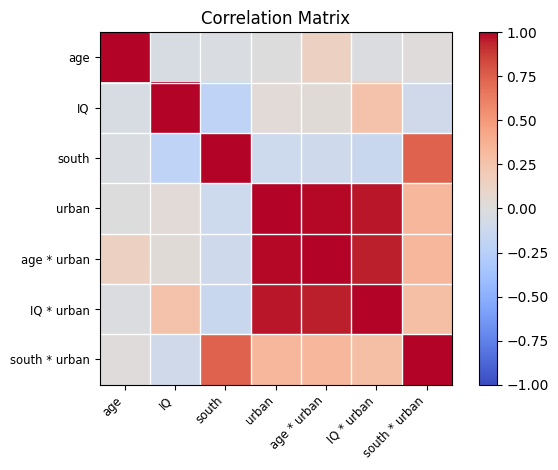

In [286]:
# Визуализация корреляций
sm.graphics.plot_corr(corr_matrix, xnames=df_corr.columns, normcolor=True, cmap='coolwarm')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

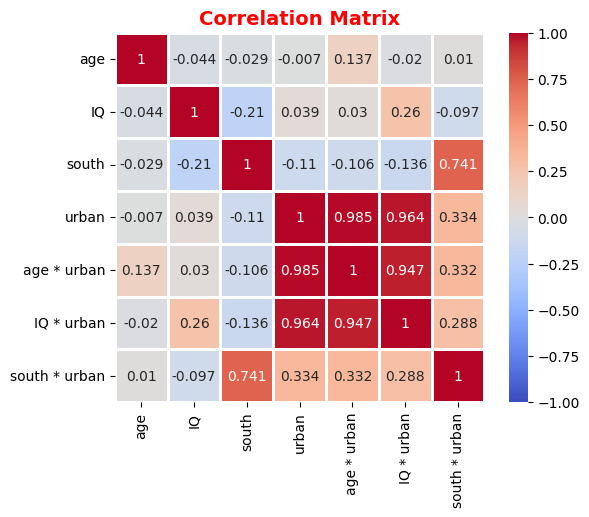

In [287]:
# Визуализация корреляций
sns.heatmap(corr_matrix, annot=True, fmt='.3g', vmin=-1, vmax=1, center=0, cmap='coolwarm', 
            square=True, linewidths=1, linecolor='white')
# add customized title to heatmap
plt.title('Correlation Matrix', loc='center', color='red', size=14, weight='bold')

### "Продвинутая" визуализация корреляций

Text(0.5, 1.0, 'Correlation Matrix')

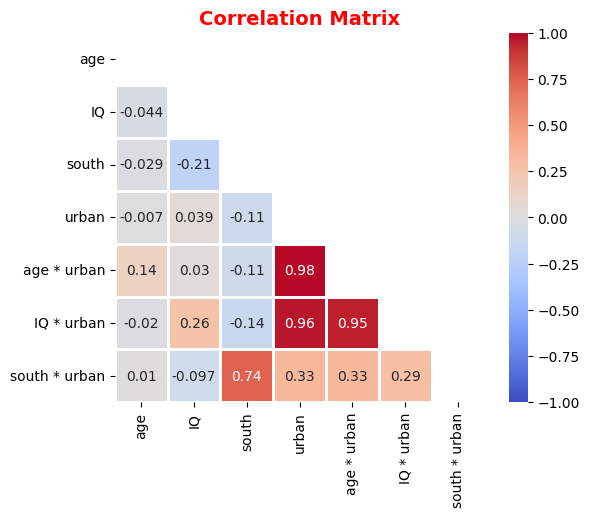

In [288]:
corr_matrix = df_corr.corr().round(3)
# нижнетреугольная матрица корреляций
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', square=True, linewidths=1, linecolor='white', mask=mask)
# add customized title to heatmap
plt.title('Correlation Matrix', loc='center', color='red', size=14, weight='bold')

Text(0.5, 1.0, 'Correlation Matrix')

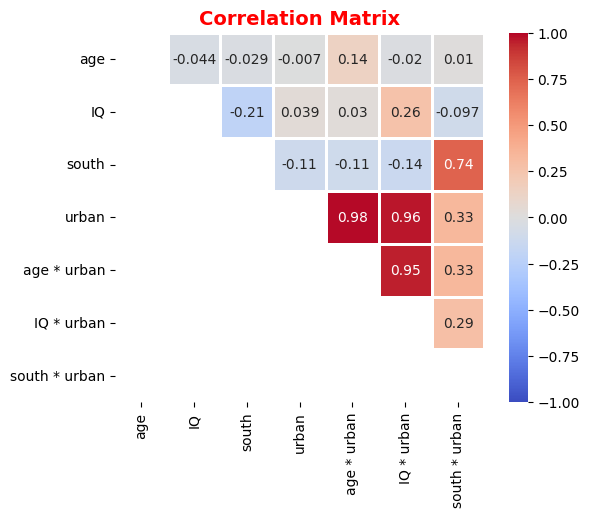

In [289]:
corr_matrix = df_corr.corr().round(3)
# верхнетреугольная матрица корреляций
mask = np.tril(corr_matrix)
sns.heatmap(corr_matrix, annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', square=True, linewidths=1, linecolor='white', mask=mask)
# add customized title to heatmap
plt.title('Correlation Matrix', loc='center', color='red', size=14, weight='bold')

In [290]:
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix[mask] = np.nan
(corr_matrix
 .style
 .set_properties(**{'text-align': 'center'})
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .format(precision=2, na_rep=" ")
 .set_caption('Correlation Matrix'))

,age,IQ,south,urban,age * urban,IQ * urban,south * urban
age,,,,,,,
IQ,-0.04,,,,,,
south,-0.03,-0.21,,,,,
urban,-0.01,0.04,-0.11,,,,
age * urban,0.14,0.03,-0.11,0.98,,,
IQ * urban,-0.02,0.26,-0.14,0.96,0.95,,
south * urban,0.01,-0.10,0.74,0.33,0.33,0.29,
